In [11]:
from sklearn import datasets

iris = datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
import pandas as pd

df = pd.DataFrame({
    'sepal length (cm)': iris.data[:, 0],
    'sepal width (cm)': iris.data[:, 1],
    'petal length (cm)': iris.data[:, 2],
    'petal width (cm)': iris.data[:, 3],
    'target': iris.target
})
df['name'] = df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


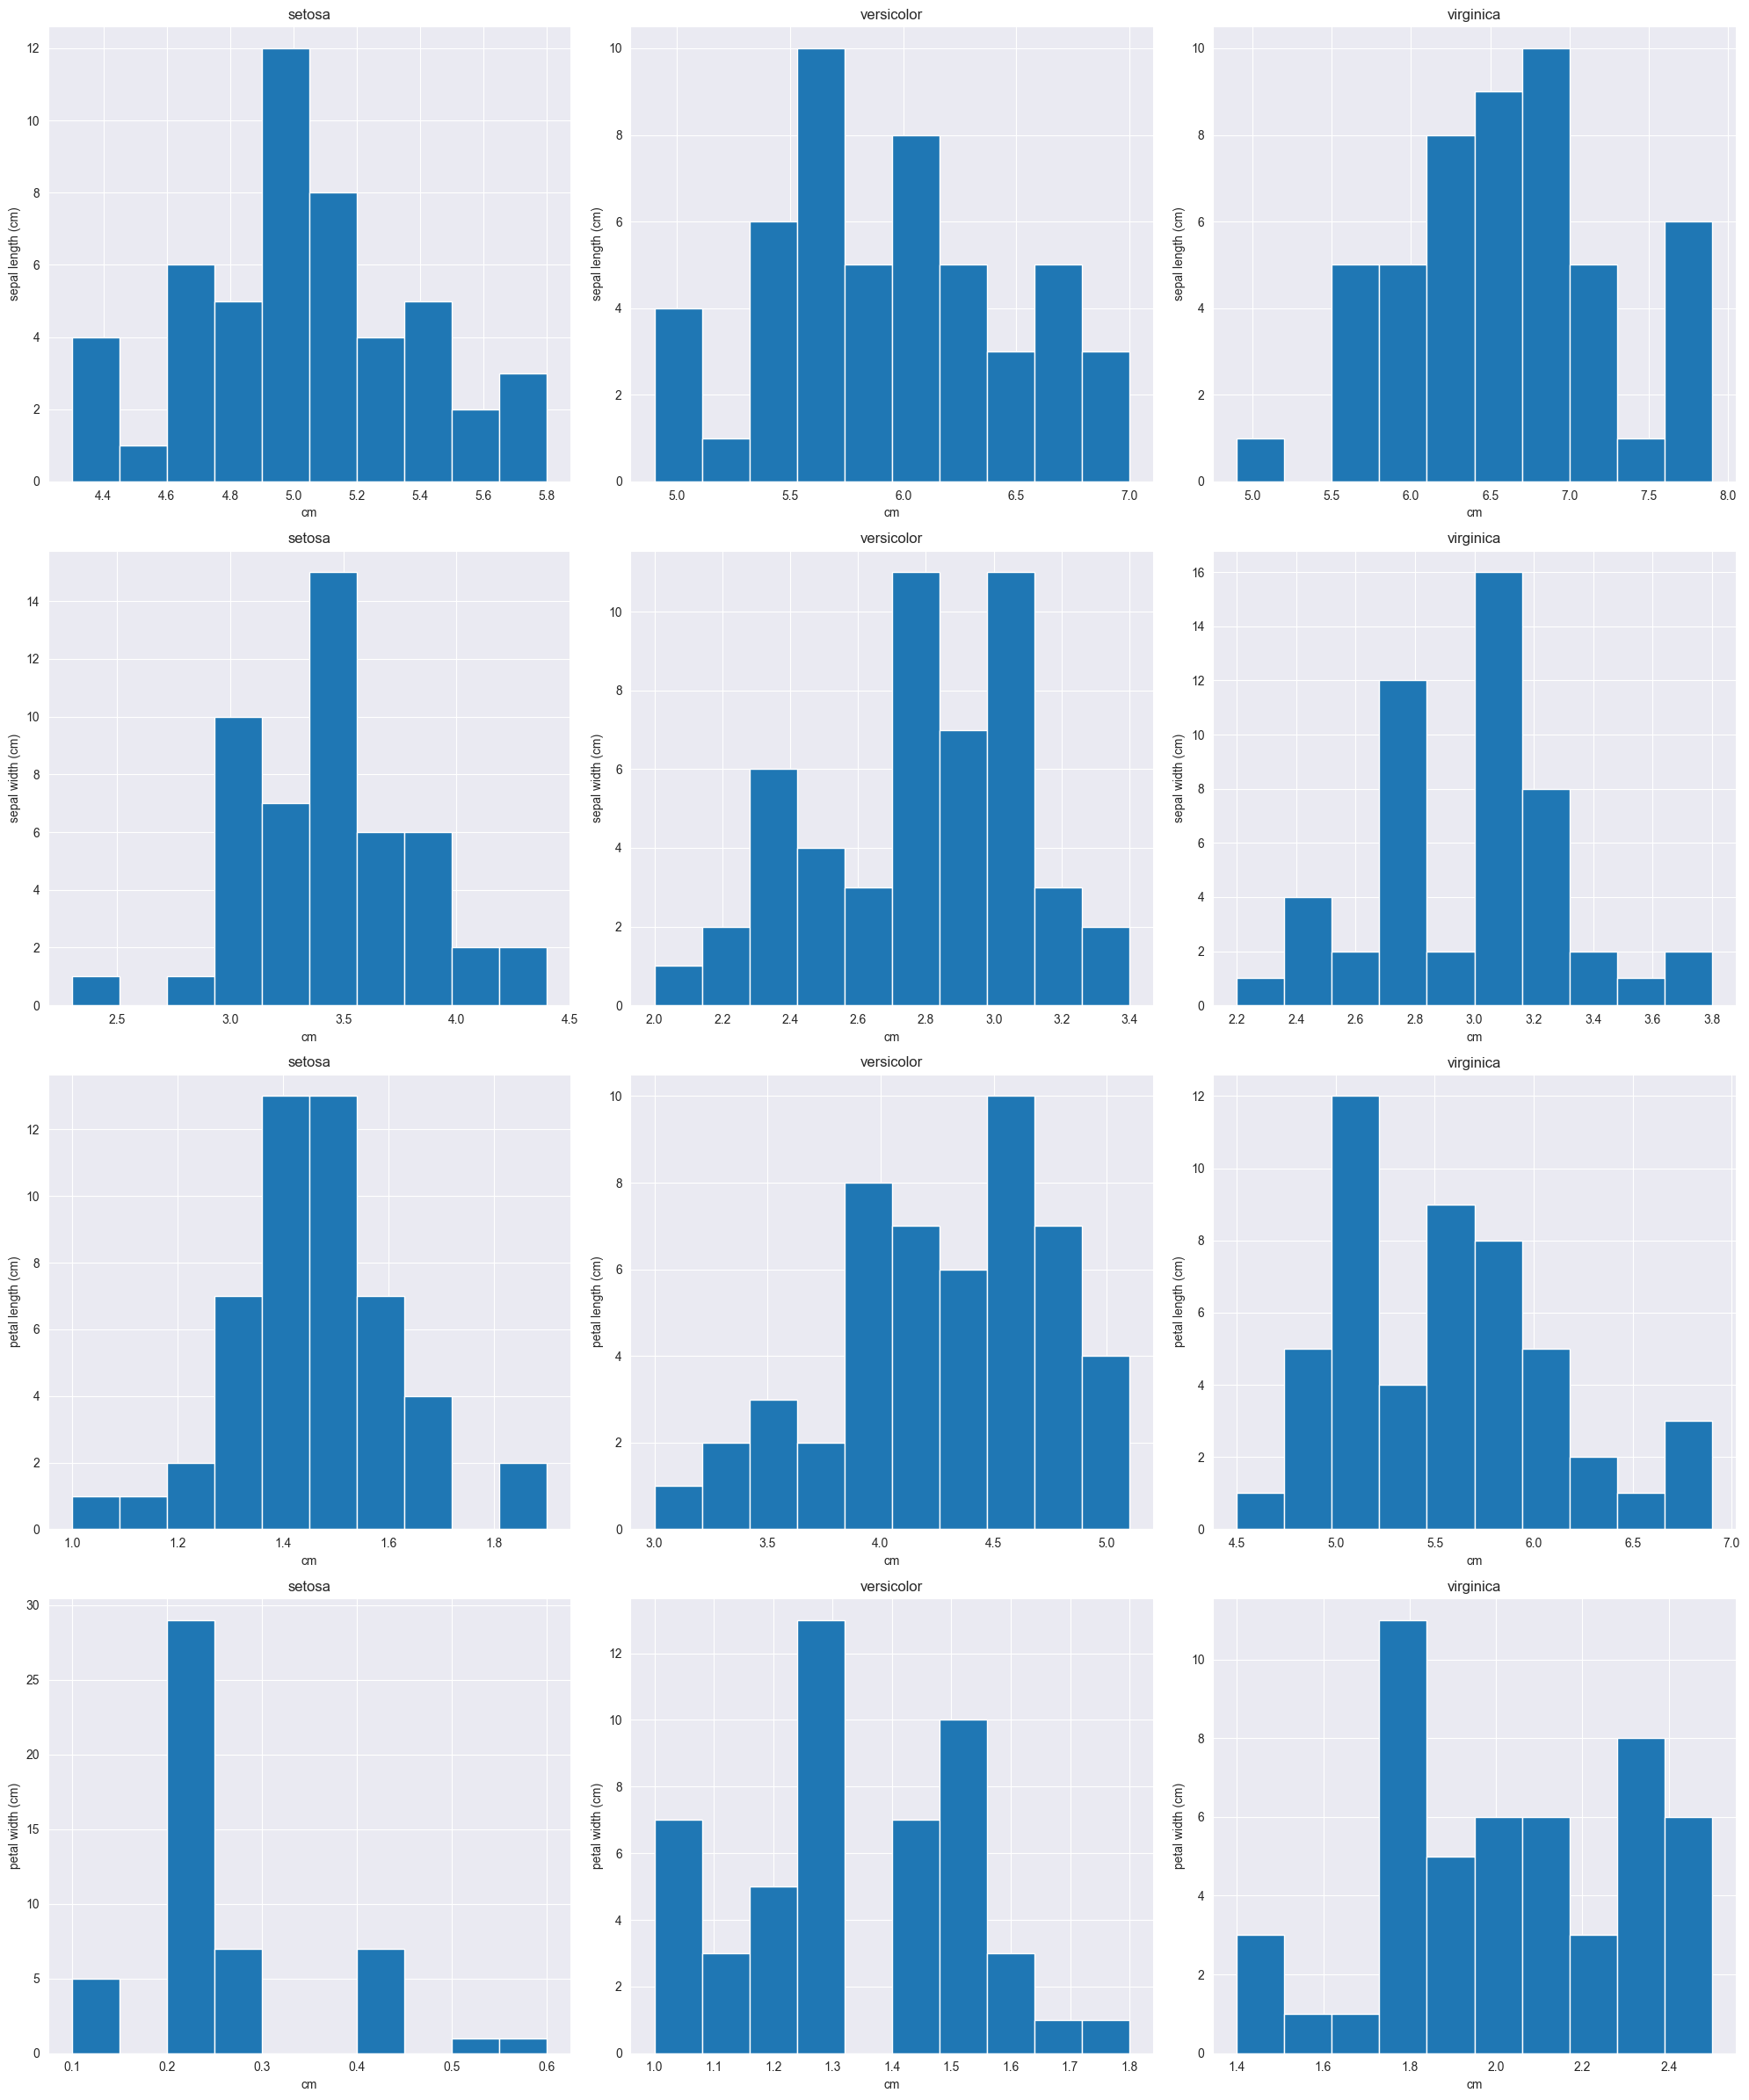

In [10]:
from matplotlib import pyplot as plt

plot_num = 0
plt.figure(figsize=(20, 24))
for feature_name in iris.feature_names:
    for target_name in iris.target_names:
        plot_num += 1
        plt.subplot(4, 3, plot_num)
        plt.hist(df[df.name == target_name][feature_name])
        plt.title(target_name)
        plt.xlabel('cm')
        plt.ylabel(feature_name)
        plt.tight_layout()

In [12]:
df[['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [19]:
from sklearn.model_selection import train_test_split

X = df[iris.feature_names]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=86)

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100)

clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9555555555555556

In [26]:
feature_imp = pd.Series(clf_rf.feature_importances_, index=iris.feature_names).sort_values()

In [28]:
print(feature_imp)

sepal width (cm)     0.029621
sepal length (cm)    0.136524
petal length (cm)    0.376545
petal width (cm)     0.457310
dtype: float64


In [29]:
from sklearn.model_selection import train_test_split

X = df[['sepal length (cm)',
 'petal length (cm)',
 'petal width (cm)']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=86)

In [30]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100)

clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9555555555555556

In [9]:
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
import keras

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [11]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [12]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train_cat, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10


1500/1500 [==============================] - 5s 3ms/step - loss: 0.5183 - accuracy: 0.8184 - val_loss: 0.4325 - val_accuracy: 0.8443
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3860 - accuracy: 0.8618 - val_loss: 0.3689 - val_accuracy: 0.8676
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3466 - accuracy: 0.8763 - val_loss: 0.3608 - val_accuracy: 0.8681
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3202 - accuracy: 0.8817 - val_loss: 0.3375 - val_accuracy: 0.8792
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2994 - accuracy: 0.8884 - val_loss: 0.3413 - val_accuracy: 0.8777
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2852 - accuracy: 0.8946 - val_loss: 0.3212 - val_accuracy: 0.8849
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2705 - accuracy: 0.9002 - val_loss: 0.3234 - val_accurac

In [14]:
model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.3542 - accuracy: 0.8780


[0.3542186915874481, 0.878000020980835]

1/1 [==============================] - 0s 30ms/step
[[1.3885349e-05 4.7044049e-09 9.8584003e-08 8.9757521e-11 9.1544550e-08
  3.5067677e-04 1.5636249e-06 3.0795377e-02 6.3286179e-06 9.6883202e-01]]
9


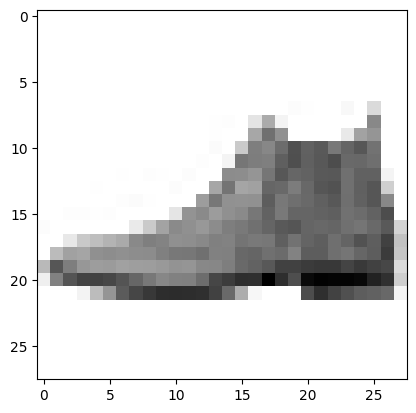

In [16]:
import numpy as np
import matplotlib.pyplot as plt
n = 0
x = np.expand_dims(X_test[n], axis=0)
res = model.predict(x)
print(res)
print(np.argmax(res))
plt.imshow(X_test[n], cmap=plt.cm.binary)
plt.show()

In [17]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)

313/313 [==============================] - 1s 3ms/step


In [18]:
print(pred.shape)

print(pred[:20])
print(y_test[:20])

(10000,)
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 2 8 0]
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]


In [19]:
mask = pred == y_test
print(mask[:10])

x_false = X_test[~mask]
y_false = X_test[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True]
(1220, 28, 28)


Значение сети: 9 
 Предсказанное значение 9


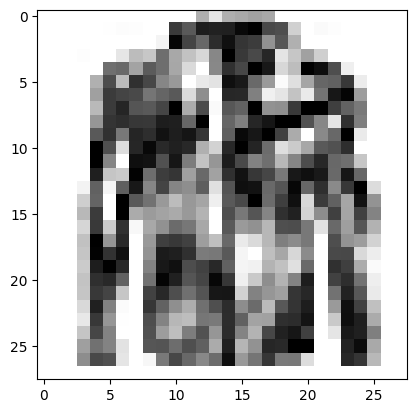

Значение сети: 2 
 Предсказанное значение 2


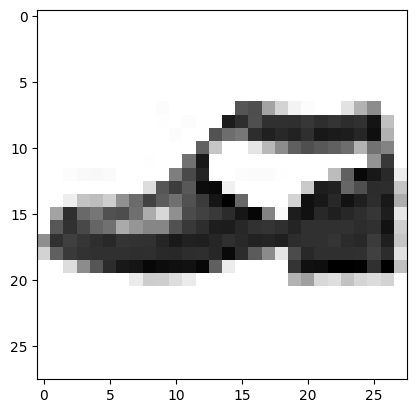

Значение сети: 1 
 Предсказанное значение 1


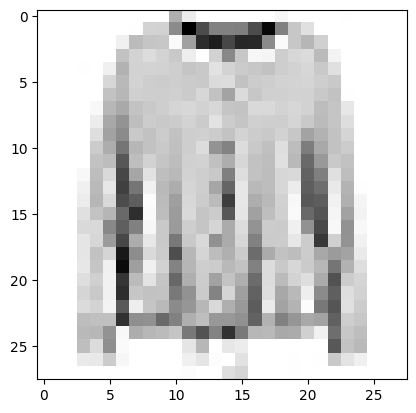

Значение сети: 1 
 Предсказанное значение 1


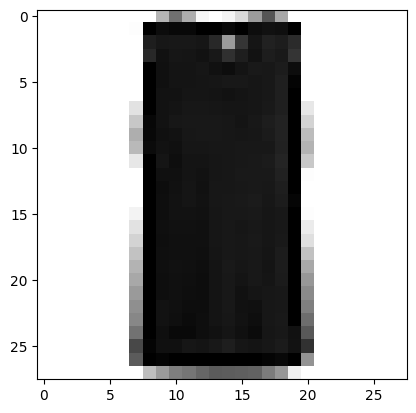

Значение сети: 6 
 Предсказанное значение 6


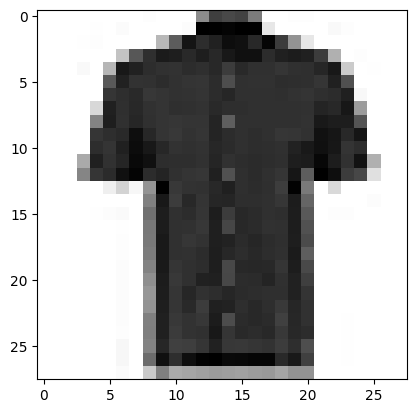

In [22]:
for i in range(5):
  print("Значение сети: "+str(y_test[i]),'\n', 'Предсказанное значение', pred[i])
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()